<a href="https://colab.research.google.com/github/pedrohcaminha/projeto1DS/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1

## Importação de bibliotecas e dados

### Importando bibliotecas

In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

### Importando dados

In [ ]:
url = 'https://raw.githubusercontent.com/pedrohcaminha/projeto1DS/main/data.csv'
data = pd.read_csv(url, sep='\t')
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition,day
0,12:51 AM,40 F,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy,1
1,1:51 AM,40 F,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy,1
2,2:51 AM,40 F,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy,1
3,3:51 AM,39 F,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy,1
4,4:51 AM,38 F,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy,1


## Tratamento de dados faltantes

### Verificando se existem dados ausentes

In [ ]:
data.isnull().sum()

Time            0
Temperature     0
Dew Point       0
Humidity        0
Wind            5
Wind Speed      0
Wind Gust       0
Pressure        0
Preciptation    0
Condition       1
day             0
dtype: int64

### Como existem poucos dados ausentes, as linhas serão removidas

In [ ]:
data.shape

(10252, 11)

In [ ]:
data.dropna(inplace=True)
data.shape

(10246, 11)

## Realizando correções de Tipos

### Verificando os tipos


In [ ]:
data.dtypes

Time            object
Temperature     object
Dew Point       object
Humidity        object
Wind            object
Wind Speed      object
Wind Gust       object
Pressure        object
Preciptation    object
Condition       object
day              int64
dtype: object

### Corrigindo os dados de tempo

In [ ]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = datetime.timedelta(hours=24)

timeseries = []
last_day = 1
for index, row in data.iterrows():
  if(last_day != row['day']):
    start_date += delta
    last_day = row['day']
  timeseries.append(str(start_date) + " " + row['Time'])
data['Time'] = timeseries
data['Time'] =  pd.to_datetime(data['Time'], infer_datetime_format=True)
data.drop(columns=['day'], inplace=True)
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40 F,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40 F,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40 F,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39 F,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38 F,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de temperatura

In [ ]:
Temperature = []
for index, row in data.iterrows():
  Temperature.append(int(''.join(filter(str.isdigit, row['Temperature']))))
data['Temperature'] = Temperature
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de ponto de condensação da água

In [ ]:
dew = []
for index, row in data.iterrows():
  dew.append(int(''.join(filter(str.isdigit, row['Dew Point']))))
data['Dew Point'] = dew
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de humidade

In [ ]:
Humidity = []
for index, row in data.iterrows():
  Humidity.append(int(''.join(filter(str.isdigit, row['Humidity'])))/100)
data['Humidity'] = Humidity
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Verificando os dados de direcao do vento (nao precisa de correcao)

In [ ]:
data['Wind'].value_counts()

S       1306
NE      1089
NW       872
ENE      783
W        679
SSW      648
SW       615
WNW      611
NNW      556
N        550
WSW      420
SSE      419
CALM     404
E        388
NNE      349
SE       229
ESE      199
VAR      129
Name: Wind, dtype: int64

In [ ]:
data['Wind'] = data['Wind'].astype('category')

### Corrigindo os dados de velocidade do vento

In [ ]:
Speed = []
for index, row in data.iterrows():
  Speed.append(int(''.join(filter(str.isdigit, row['Wind Speed']))))
data['Wind Speed'] = Speed
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de velocidade da rajada do vento

In [ ]:
Gust = []
for index, row in data.iterrows():
  Gust.append(int(''.join(filter(str.isdigit, row['Wind Gust']))))
data['Wind Gust'] = Gust
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de pressao

In [ ]:
Pressure = []
for index, row in data.iterrows():
  Pressure.append(int(''.join(filter(str.isdigit, row['Pressure'])))/100)
data['Pressure'] = Pressure
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66,0.0 in,Cloudy


### Corrigindo os dados de precipitacao

In [ ]:
Preciptation = []
for index, row in data.iterrows():
  Preciptation.append(int(''.join(filter(str.isdigit, row['Preciptation'])))/100)
data['Preciptation'] = Preciptation
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63,0.0,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64,0.0,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64,0.0,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66,0.0,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66,0.0,Cloudy


### Verificando os dados de condicoes

In [ ]:
data['Condition'].value_counts()

Mostly Cloudy              2829
Cloudy                     2028
Fair                       1904
Partly Cloudy              1266
Light Rain                  829
Fog                         197
Mostly Cloudy / Windy       144
Rain                        127
Light Rain / Windy          123
Light Drizzle               116
Fair / Windy                110
Partly Cloudy / Windy        84
Cloudy / Windy               75
Heavy Rain                   52
Light Snow                   38
Haze                         35
Light Rain with Thunder      31
T-Storm                      28
Thunder in the Vicinity      28
Drizzle and Fog              28
Thunder                      26
Light Snow / Windy           23
Heavy Rain / Windy           22
Rain / Windy                 21
Wintry Mix                   12
Snow / Windy                 10
Light Drizzle / Windy        10
Heavy T-Storm / Windy         8
Heavy T-Storm                 8
Snow and Sleet / Windy        7
T-Storm / Windy               5
Haze / W

In [ ]:
data['Condition'] = data['Condition'].astype('category')

### Verificando os dados após as correcoes

In [ ]:
data.dtypes

Time            datetime64[ns]
Temperature              int64
Dew Point                int64
Humidity               float64
Wind                  category
Wind Speed               int64
Wind Gust                int64
Pressure               float64
Preciptation           float64
Condition             category
dtype: object

## Analise de dados Univariados

### Temperatura

Descricao da temperatura

In [ ]:
data['Temperature'].describe()

count    10246.000000
mean        58.203592
std         16.487466
min         15.000000
25%         45.000000
50%         57.000000
75%         73.000000
max         97.000000
Name: Temperature, dtype: float64

Temperaturas medias mensais ao longo do ano

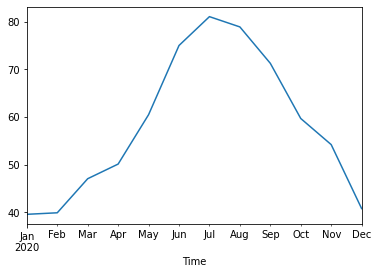

In [ ]:
data.resample('M', on='Time').mean()['Temperature'].plot()

Distribuicao das temperaturas ao longo do ano de acordo com os meses

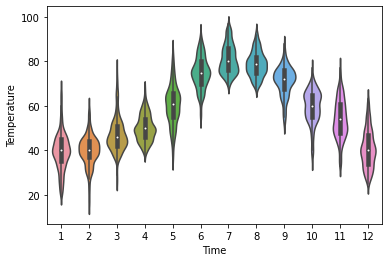

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Temperature'] )

### Dew Point

Descricao do ponto de condensação da água

In [ ]:
data['Dew Point'].describe()

count    10246.000000
mean        43.948175
std         17.607824
min          0.000000
25%         31.000000
50%         43.000000
75%         60.000000
max         75.000000
Name: Dew Point, dtype: float64

Pontos de condensação da água medios mensais ao longo do ano

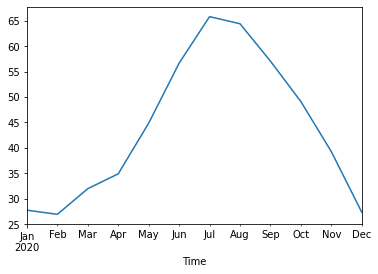

In [ ]:
data.resample('M', on='Time').mean()['Dew Point'].plot()

Distribuicao dos pontos de condensação da água ao longo do ano de acordo com os meses

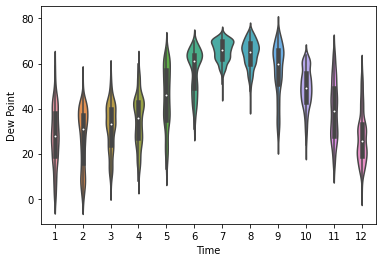

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Dew Point'] )

### Humidity

Descricao da Humidade

In [ ]:
data['Humidity'].describe()

count    10246.000000
mean         0.621752
std          0.191933
min          0.140000
25%          0.470000
50%          0.630000
75%          0.790000
max          1.000000
Name: Humidity, dtype: float64

Humidades medias mensais ao longo do ano

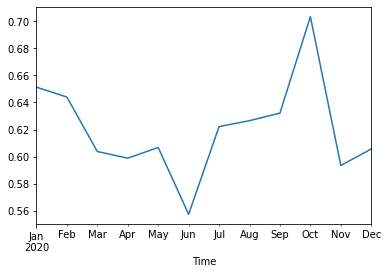

In [ ]:
data.resample('M', on='Time').mean()['Humidity'].plot()

Distribuicao das humidades ao longo do ano de acordo com os meses

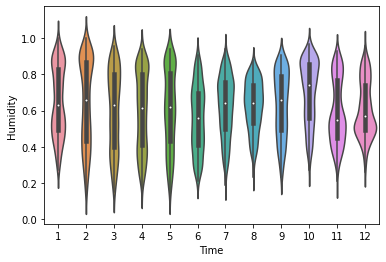

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Humidity'] )

### Wind

Descricao do vento

In [ ]:
data['Wind'].describe()

count     10246
unique       18
top           S
freq       1306
Name: Wind, dtype: object

Contagem das direçoes dos ventos

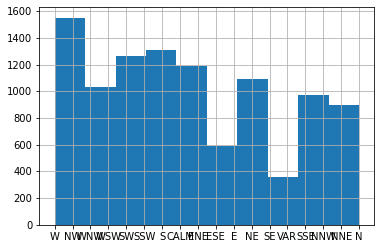

In [ ]:
data['Wind'].hist()

### Wind speed


Descricao da velocidade do vento

In [ ]:
data['Wind Speed'].describe()

count    10246.000000
mean        10.654792
std          5.728815
min          0.000000
25%          7.000000
50%          9.000000
75%         14.000000
max         53.000000
Name: Wind Speed, dtype: float64

velocidades do vento medias mensais ao longo do ano

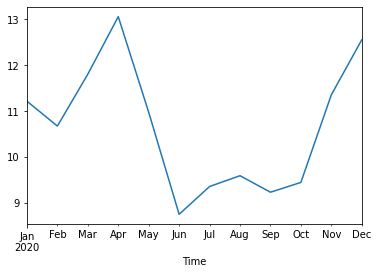

In [ ]:
data.resample('M', on='Time').mean()['Wind Speed'].plot()

Distribuicao das velocidades do vento ao longo do ano de acordo com os meses

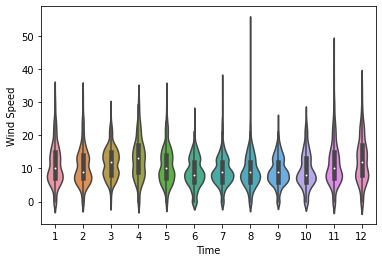

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Wind Speed'] )

### Wind gust



Descricao da velocidade de rajada do vento

In [ ]:
data['Wind Gust'].describe()

count    10246.000000
mean         4.830470
std         10.928297
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         69.000000
Name: Wind Gust, dtype: float64

velocidades de rajada do vento medias mensais ao longo do ano

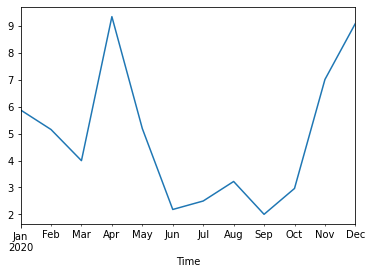

In [ ]:
data.resample('M', on='Time').mean()['Wind Gust'].plot()

Distribuicao das velocidades de rajada do vento ao longo do ano de acordo com os meses

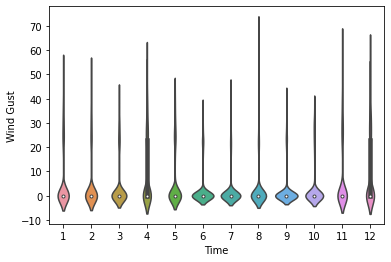

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Wind Gust'] )

### Pressure



Descricao da pressao

In [ ]:
data['Pressure'].describe()

count    10246.000000
mean        29.990655
std          0.381287
min          0.000000
25%         29.840000
50%         29.980000
75%         30.150000
max         30.740000
Name: Pressure, dtype: float64

pressoes medias mensais ao longo do ano

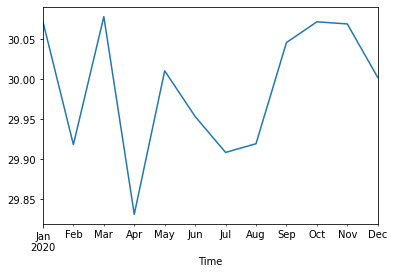

In [ ]:
data.resample('M', on='Time').mean()['Pressure'].plot()

Distribuicao das pressoes ao longo do ano de acordo com os meses

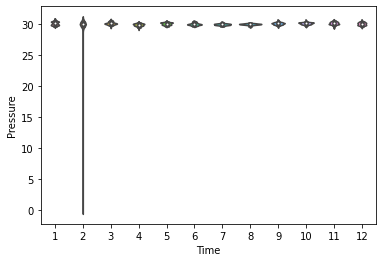

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Pressure'] )

Removendo esse outlier de pressao (erro) através da insercao da media

In [ ]:
pressao = []
for index, row in data.iterrows():
  if(row['Pressure']) < 20:
    pressao.append(data['Pressure'].mean())
  else:
    pressao.append(row['Pressure'])
data['Pressure'] = pressao

Verificando correcao

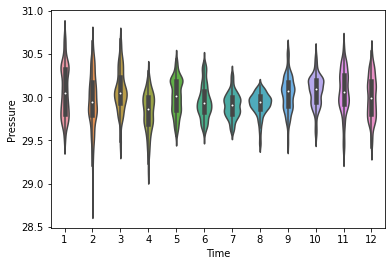

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Pressure'] )

### Preciptation



Descricao da precipitacao

In [ ]:
data['Preciptation'].describe()

count    10246.000000
mean         0.000641
std          0.004098
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.130000
Name: Preciptation, dtype: float64

precipitacoes medias mensais ao longo do ano

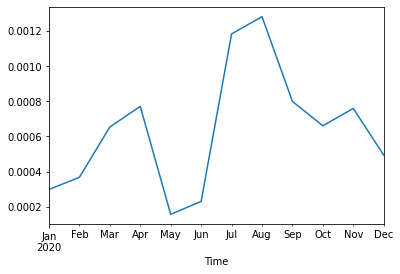

In [ ]:
data.resample('M', on='Time').mean()['Preciptation'].plot()

Distribuicao das precipitacoes ao longo do ano de acordo com os meses

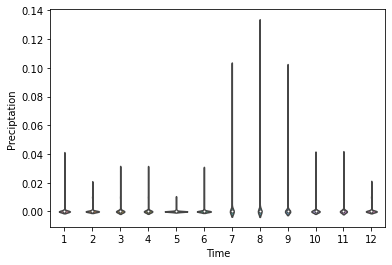

In [ ]:
sns.violinplot(x=data['Time'].dt.month, y=data['Preciptation'] )

### Condition

Descricao da condicao

In [ ]:
data['Condition'].describe()

count             10246
unique               40
top       Mostly Cloudy
freq               2829
Name: Condition, dtype: object

Contagem das condicoes

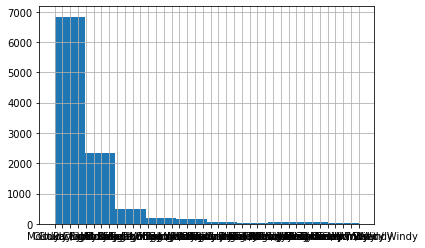

In [ ]:
data['Condition'].hist()

## Teste de hipóteses

Podemos Observar uma grande diferença entre a temperatura no mes de Julho e no restante do ano. Logo podemos fazer a seguinte inferência: A temperatura Média em julho é diferente da temperatura no restante do ano em NY 

H0 : A temperatura média em Julho é igual à temperatura média anual.

Ha: A temperatura média em Julho Não é igual à temperatura média anual

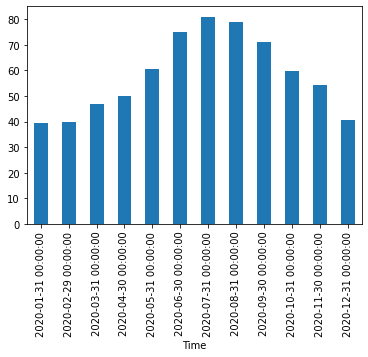

In [ ]:
data.resample('M', on='Time').mean()['Temperature'].plot.bar()

In [ ]:
M = data.Temperature.mean() # Colhendo a temperatura média anual
X = data.resample('M', on='Time').mean()['Temperature'][7] #Colhendo a temperatura média para o mês de Julho
sigma = data.resample('M', on='Time').std()['Temperature'][7] #Colhendo o desvio padrão populacional
alfa = 0.05
days= 31
Z = 1.88

In [ ]:
# Calculando Z-score
zo = (X - M)/(sigma/np.sqrt(31))
zo

20.28228731607314

Olhando na tabela de distribuição normal vemos que Zo pertece à região crítica, abandonamos então a hipótese nula. 

Logo, com um nível de significancia de 5% podemos afirmar que a temperatura média em Julho não é igual à temperatura média

# Projeto 2

## Selecionando coluna para predição

### Matriz de correlação

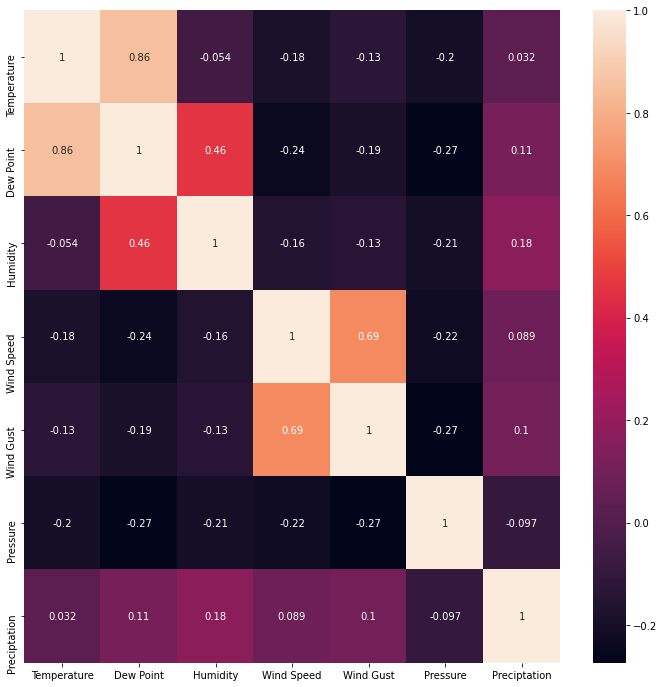

In [ ]:
import matplotlib.pyplot as plt 

corrMatrix = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True,)

### A coluna de temperatura foi escolhida para ser predita

In [ ]:
data.Temperature.value_counts()

45    284
42    267
75    265
43    259
50    257
     ... 
16      3
19      2
20      2
15      2
17      1
Name: Temperature, Length: 83, dtype: int64

In [ ]:
data.Temperature.unique()

array([40, 39, 38, 37, 36, 34, 35, 42, 43, 45, 46, 48, 49, 47, 44, 41, 33,
       32, 30, 29, 28, 27, 26, 25, 24, 31, 52, 53, 51, 50, 58, 60, 63, 64,
       62, 59, 55, 54, 56, 57, 61, 65, 66, 67, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 68, 70, 71, 72, 69, 73, 77, 75, 74, 78, 80, 79, 76, 82, 83,
       85, 84, 81, 86, 88, 89, 91, 90, 87, 93, 92, 94, 95, 96, 97])

In [ ]:
data = data[['Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'Preciptation', 'Temperature']].copy()

In [ ]:
data.head()

,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Preciptation,Temperature
0,25,0.55,14,24,29.63,0.0,40
1,26,0.58,17,22,29.64,0.0,40
2,25,0.55,16,28,29.64,0.0,40
3,23,0.53,16,0,29.66,0.0,39
4,23,0.55,14,23,29.66,0.0,38


## Analisando a coluna de temperatura

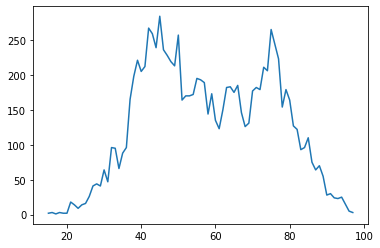

In [ ]:
temp = data.Temperature.value_counts().sort_index()
plt.plot(temp)

## Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
from matplotlib import pyplot as plt

## Regressão Linear Simples

In [ ]:
data.columns

Index(['Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure',
       'Preciptation', 'Temperature'],
      dtype='object')

### Dew Point

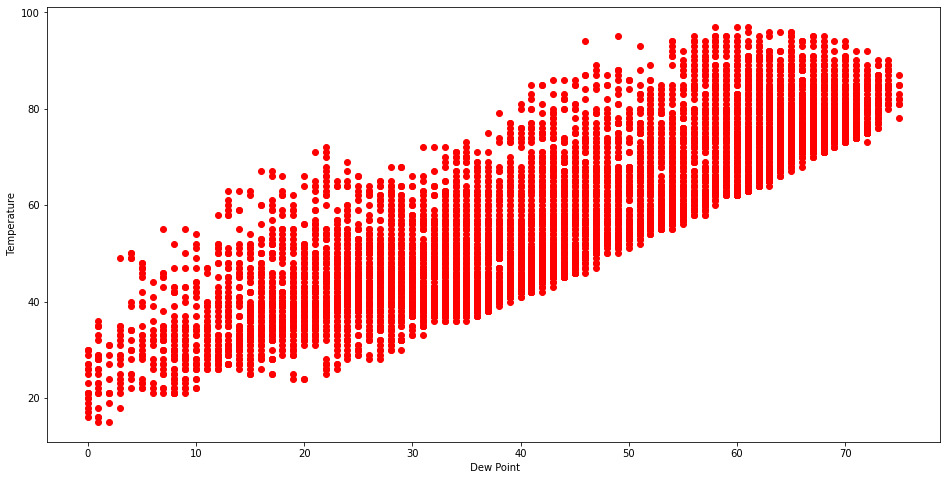

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Dew Point'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Dew Point")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Dew Point'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 23.012 + 0.80075X


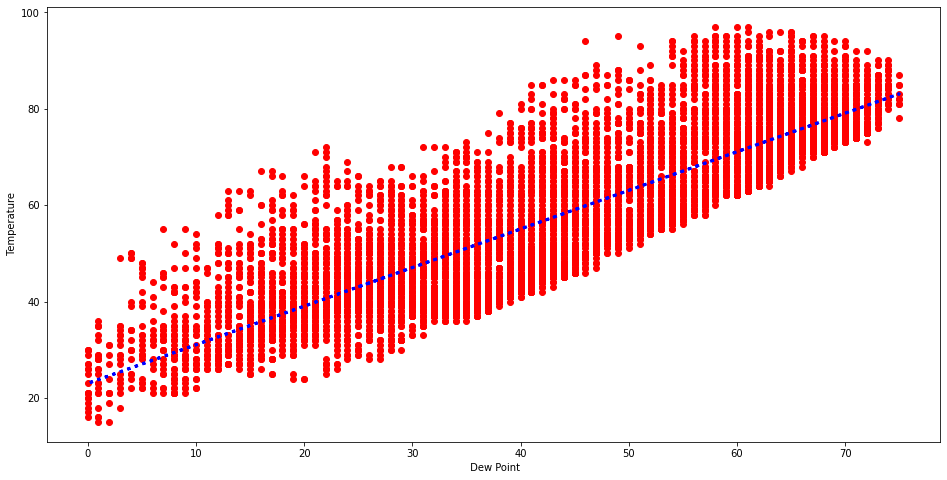

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Dew Point'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Dew Point'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Dew Point")
plt.ylabel(" Temperature")
plt.show()


In [ ]:
X = data['Dew Point']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 2.788e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:31:13   Log-Likelihood:                -36521.
No. Observations:               10246   AIC:                         7.305e+04
Df Residuals:                   10244   BIC:                         7.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0120      0.227    101.356      0.0

### Humidity

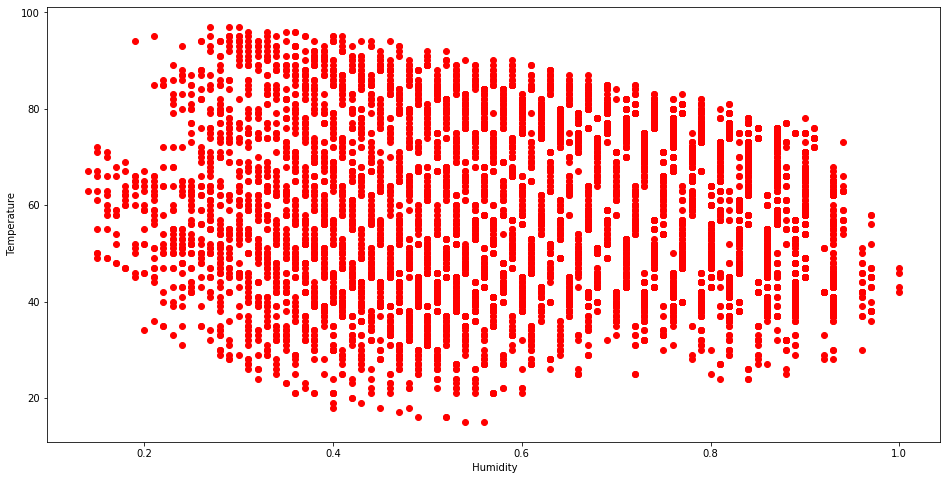

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Humidity'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Humidity")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Humidity'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 61.065 + -4.603X


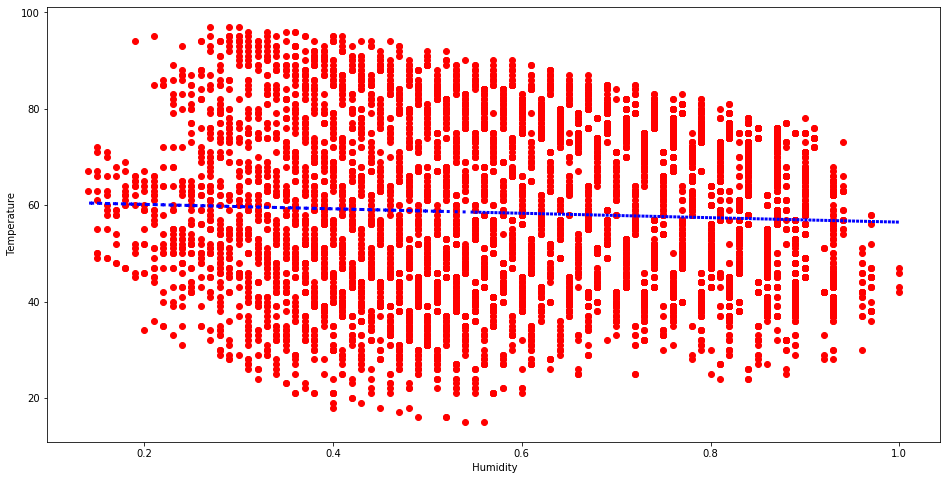

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Humidity'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Humidity'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Humidity")
plt.ylabel(" Temperature")
plt.show()


In [ ]:
X = data['Humidity']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     29.50
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           5.73e-08
Time:                        17:31:14   Log-Likelihood:                -43239.
No. Observations:               10246   AIC:                         8.648e+04
Df Residuals:                   10244   BIC:                         8.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0655      0.551    110.731      0.0

### Wind Speed

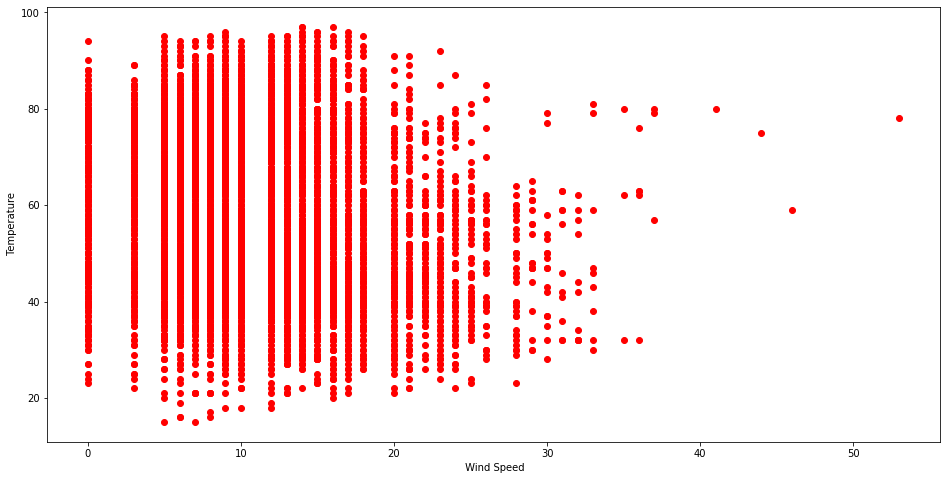

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Wind Speed'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Wind Speed")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Wind Speed'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 63.737 + -0.51931X


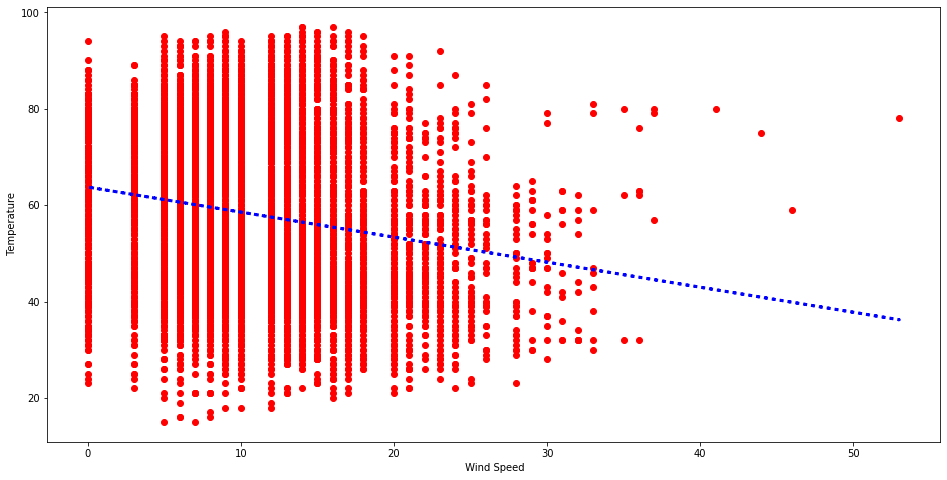

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Wind Speed'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Wind Speed'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Wind Speed")
plt.ylabel(" Temperature")
plt.show()


In [ ]:
X = data['Wind Speed']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     344.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.02e-75
Time:                        17:31:14   Log-Likelihood:                -43084.
No. Observations:               10246   AIC:                         8.617e+04
Df Residuals:                   10244   BIC:                         8.619e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7367      0.338    188.382      0.0

### Wind Gust

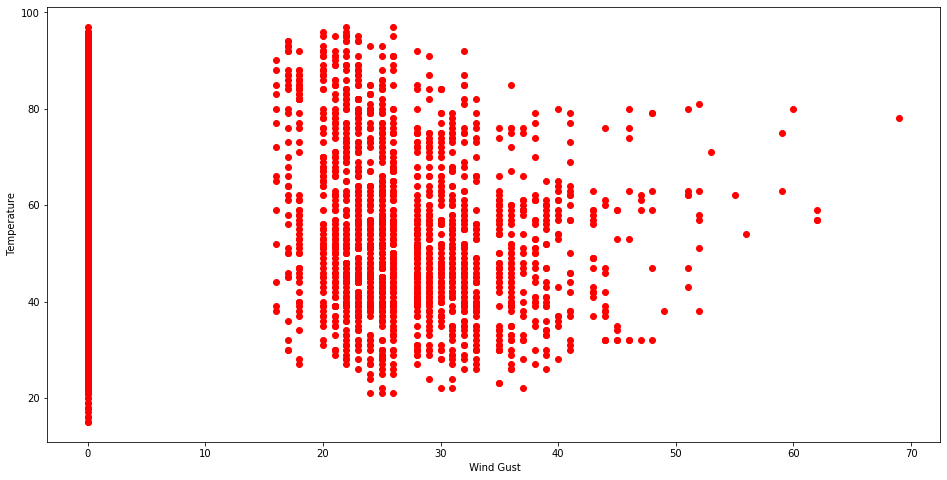

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Wind Gust'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Wind Gust")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Wind Gust'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 59.157 + -0.19745X


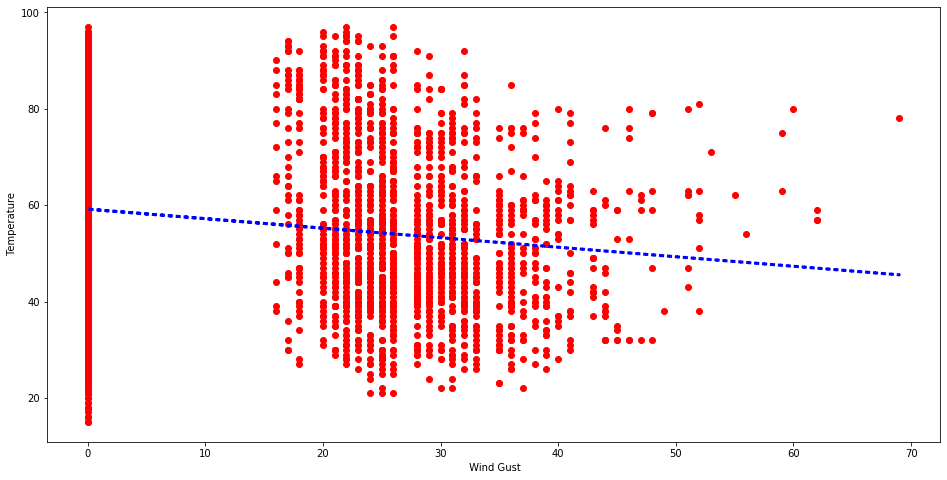

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Wind Gust'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Wind Gust'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Wind Gust")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Wind Gust']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     178.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           2.22e-40
Time:                        17:31:15   Log-Likelihood:                -43165.
No. Observations:               10246   AIC:                         8.633e+04
Df Residuals:                   10244   BIC:                         8.635e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1574      0.177    335.048      0.0

### Pressure

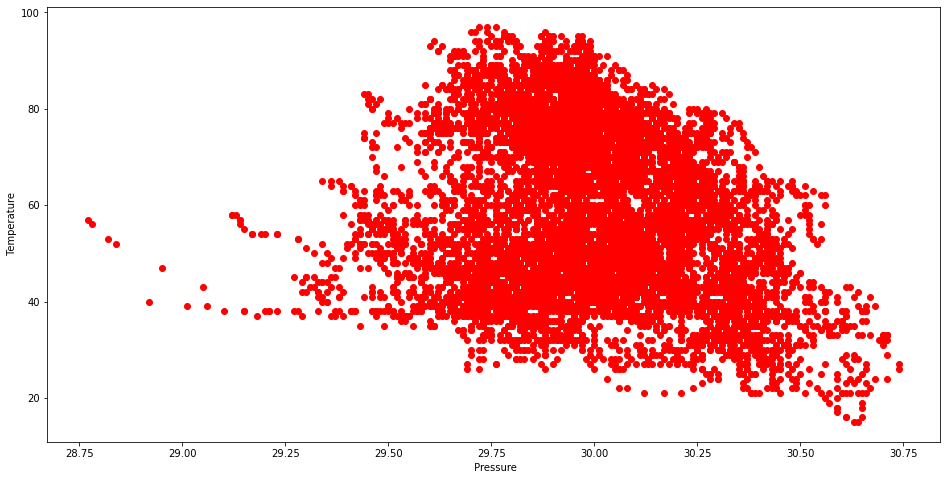

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Pressure'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Pressure")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Pressure'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 479.43 + -14.044X


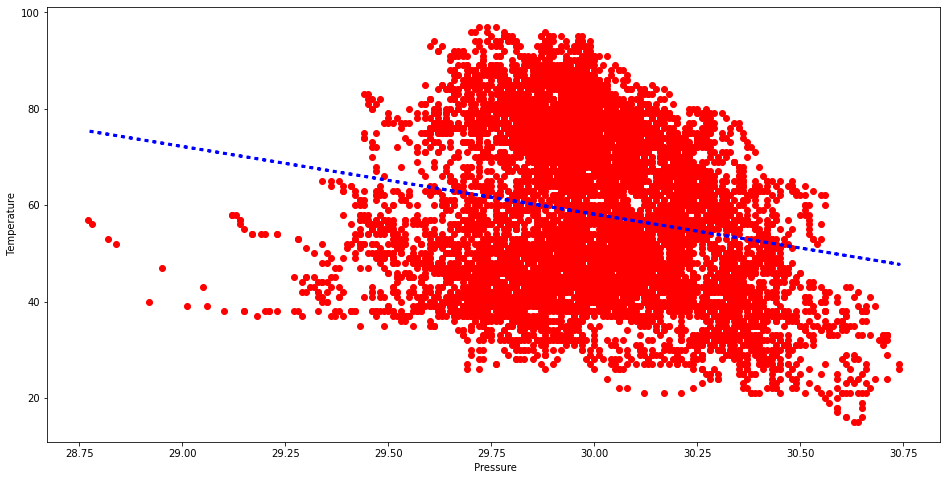

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Pressure'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Pressure'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Pressure")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Pressure']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     446.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           4.57e-97
Time:                        17:31:15   Log-Likelihood:                -43035.
No. Observations:               10246   AIC:                         8.607e+04
Df Residuals:                   10244   BIC:                         8.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        479.4295     19.933     24.053      0.0

### Preciptation

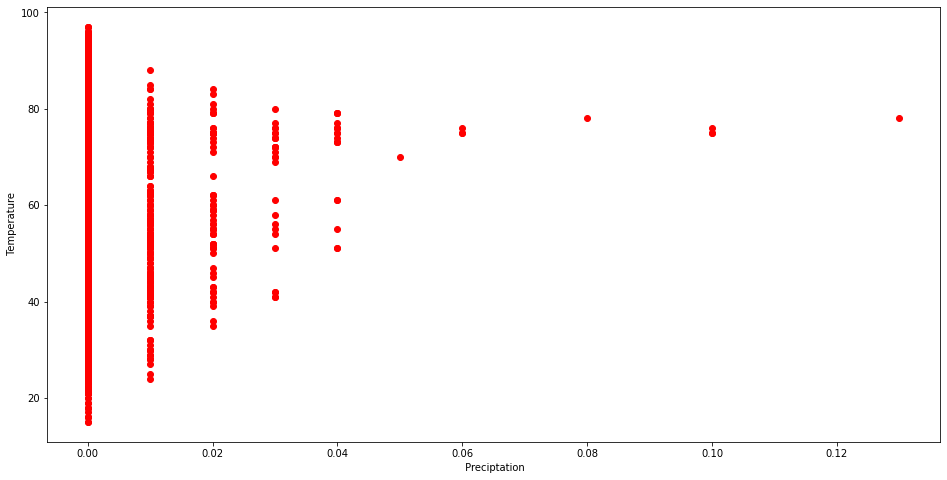

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    data['Preciptation'], 
    data['Temperature'], 
    c='red')
plt.xlabel(" Preciptation")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Preciptation'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperature = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Temperature = 58.12 + 130.01X


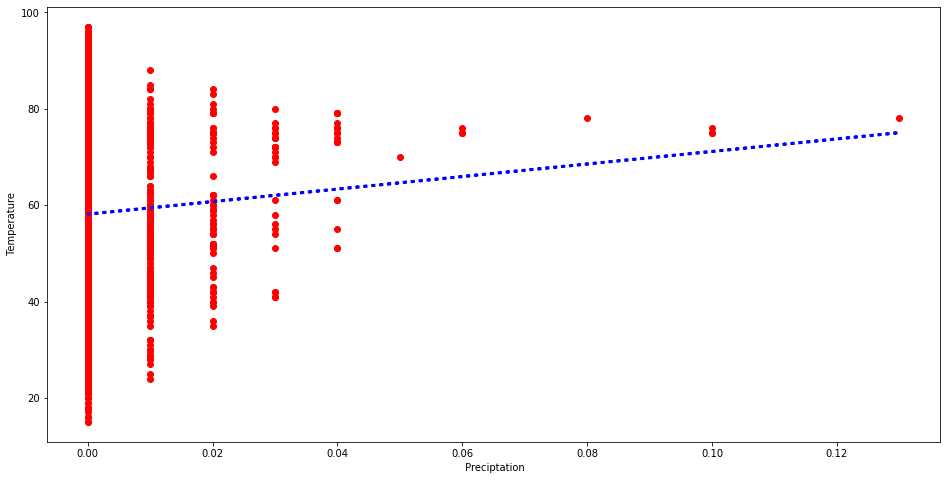

In [ ]:
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    data['Preciptation'], 
    data['Temperature'], 
    c='red')


plt.plot(
    data['Preciptation'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Preciptation")
plt.ylabel(" Temperature")
plt.show()

In [ ]:
X = data['Preciptation']
y = data['Temperature']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.71
Date:                Tue, 06 Apr 2021   Prob (F-statistic):            0.00107
Time:                        17:31:16   Log-Likelihood:                -43248.
No. Observations:               10246   AIC:                         8.650e+04
Df Residuals:                   10244   BIC:                         8.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.1202      0.165    352.699   

## Regressão Linear Multipla

In [ ]:
Xs = data.drop(['Temperature'], axis=1)
y = data['Temperature']


reg = LinearRegression()
reg.fit(Xs, y)


print("O modelo é: Temperature = {:.5} + {:.5}*Dew Point + {:.5}*Humidity + {:.5}*Wind Speed + {:.5}*Wind Gust + {:.5}*Pressure + {:.5}*Preciptation".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5]))

O modelo é: Temperature = 86.17 + 1.0412*Dew Point + -49.346*Humidity + -0.018355*Wind Speed + -0.0040359*Wind Gust + -1.4287*Pressure + 31.353*Preciptation


In [ ]:
X = np.column_stack((data['Dew Point'], data['Humidity'], data['Wind Speed'], data['Wind Gust'], data['Pressure'], data['Preciptation']))
y = data.Temperature


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.372e+05
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:32:21   Log-Likelihood:                -20717.
No. Observations:               10246   AIC:                         4.145e+04
Df Residuals:                   10239   BIC:                         4.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1702      2.566     33.578      0.0

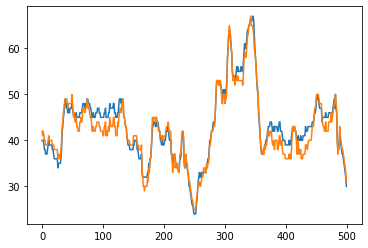

In [ ]:
coef = [reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5]]
real = []
estimado = []
for index in range(500):
  temperatura = coef[0] + data['Dew Point'][index] * coef[1] + data['Humidity'][index] * coef[2] + data['Wind Speed'][index] * coef[3] + data['Wind Gust'][index] * coef[4] + data['Pressure'][index] * coef[5] + data['Preciptation'][index] * coef[6]
  real.append(int(temperatura))
  estimado.append(data['Temperature'][index])
comp = pd.DataFrame(real, estimado)
comp = comp.reset_index()
comp.columns = ['real', 'estimado']
plt.plot(comp.index, comp.real, comp.index, comp.estimado)
plt.show()
plt.close()